In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import math
from scipy.stats import distributions as dists 

#Load data
payroll = pd.read_csv("processed_data.csv") 

c:\users\sweta\appdata\local\programs\python\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4,24,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [68]:
#To remove the outlier
def outlier_range(x):
    x = np.array(x)
    upper_q = np.percentile(x, 75)
    lower_q = np.percentile(x, 25)
    iqr = (upper_q - lower_q) * 1.5
    #print("IQR:",iqr," lower:",lower_q," upper:",upper_q)
    acceptable_range = (lower_q - iqr, upper_q + iqr)
    return acceptable_range

In [77]:
def waldstest(payroll, year1, year2, attribute):
    z_critical = 1.96
    payroll = payroll[payroll.employment_type == 'Full Time']
    payroll_y1 = payroll[payroll.year ==year1]
    payroll_y2 = payroll[payroll.year ==year2]
    payroll_y1 = payroll_y1[payroll_y1[attribute] > 0]
    payroll_y2 = payroll_y2[payroll_y2[attribute] > 0]
    
    clean_y1 = payroll_y1[attribute].values
    outlier = outlier_range(clean_y1)
    index = []
    for i in range(len(clean_y1)):
        if clean_y1[i] < outlier[0] and clean_y1[i] > outlier[1]:
            index.append(i)
    clean_y1 = np.delete(clean_y1,index)
    
    clean_y2 = payroll_y2[attribute].values
    outlier = outlier_range(clean_y2)
    index = []
    for i in range(len(clean_y2)):
        if clean_y2[i] < outlier[0] and clean_y2[i] > outlier[1]:
            index.append(i)
    clean_y2 = np.delete(clean_y2,index)
    
    payroll_y1_pop_mean = clean_y1.mean() #Population Mean - True Mean
    payroll_y1_sample_std = np.std(clean_y1)

    payroll_y2_sample_mean = clean_y2.mean() #Sample Mean - [Theta_hat]
    payroll_y2_sample_std = np.std(clean_y2)
    print("Statistics :: ",payroll_y1_pop_mean,payroll_y1_sample_std,payroll_y2_sample_mean,payroll_y2_sample_std)
    
    
    wald_statistic = (payroll_y2_sample_mean - payroll_y1_pop_mean)/payroll_y2_sample_std

#     wald_statistic = (payroll_y2_sample_mean - payroll_y1_pop_mean)/math.sqrt((payroll_y1_sample_std**2 + payroll_y2_sample_std**2)/len(clean_y1))
    
    print("Wald's Statistic = ",wald_statistic)
    if wald_statistic >z_critical :
        print("H0 Rejected")
    else:
        print("H0 Accepted")
    
    
    #Plot graph
    plt.figure(figsize=(20,10))
    payroll_y1.insert(0, 'ID', range(0, 0 + len(payroll_y1)))
    payroll_y2.insert(0, 'ID', range(0, 0 + len(payroll_y2)))
    plt.scatter(payroll_y1['ID'], payroll_y1[attribute],label = year1,marker='x')
    plt.scatter(payroll_y2['ID'], payroll_y2[attribute],label = year2,marker='x')
    plt.legend()
    plt.show()
    
    

Statistics ::  93490.5128979 40047.7785581 97710.0206538 43643.1908903
Wald's Statistic =  0.0966819260879
H0 Accepted


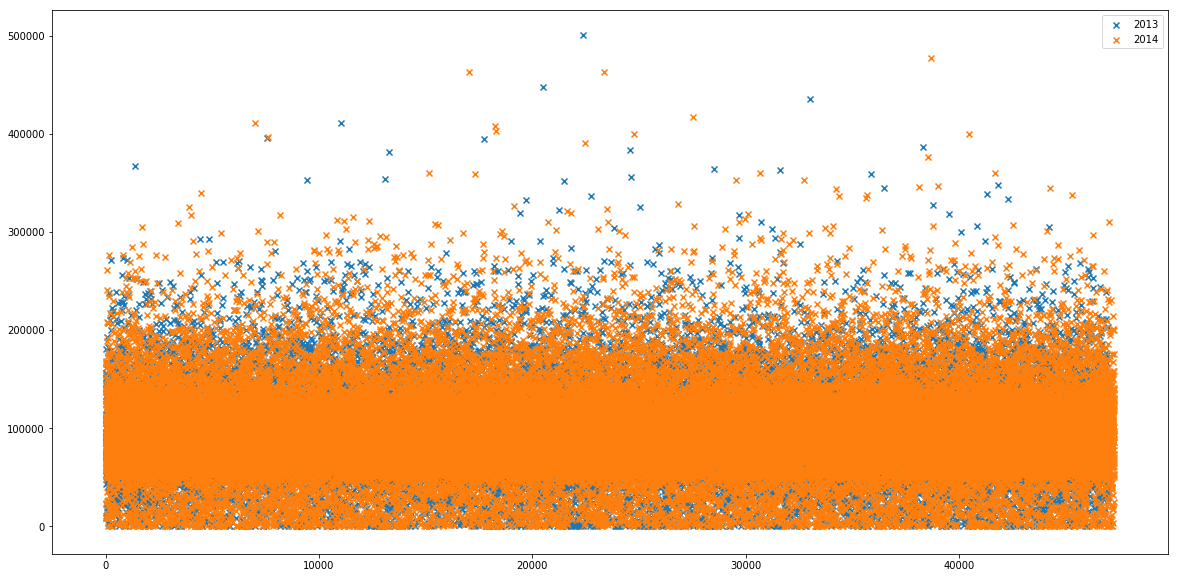

In [78]:
"""
Null Hypothesis : Total_Pay does not increase in 2014 as compared to 2013
Alternate Hypothesis: It increases
Technique : Wald's Test 
    True Mean : 2013
    Estimated Mean : 2014
"""
waldstest(payroll, 2013, 2014, 'total_payments')

In [71]:
"""
Null Hypothesis : Total_Pay does not increase in 2015as compared to 2014
Alternate Hypothesis: It increases
Technique : Wald's Test 
    True Mean : 2014
    Estimated Mean : 2015
"""
waldstest(payroll, 2014, 2015, 'total_payments')

Statistics ::  97710.0206538 43643.1908903 98482.0522539 46876.7455947
Wald's Statistic =  0.0164693941601
H0 Accepted


In [72]:
"""
Null Hypothesis : Aerage Benefit COst does not increase in 2014 as compared to 2013
Alternate Hypothesis: It increases
Technique : Wald's Test 
    True Mean : 2013
    Estimated Mean : 2014
"""
waldstest(payroll, 2013, 2014, 'hourly_or_event_rate')

Statistics ::  40.9397876034 13.2666162637 42.2174053376 13.316504447
Wald's Statistic =  0.0959424253784
H0 Accepted


In [73]:
"""
Null Hypothesis : Aerage Benefit COst does not increase in 2015 as compared to 2014
Alternate Hypothesis: It increases
Technique : Wald's Test 
    True Mean : 2014
    Estimated Mean : 2015
"""
waldstest(payroll, 2014, 2015, 'hourly_or_event_rate')

Statistics ::  42.2174053376 13.316504447 42.8328666983 13.9255580567
Wald's Statistic =  0.0441965311691
H0 Accepted
